# 1スクレイピングとは(APIがない場合の手段)


目次https://docs.google.com/document/d/1tA8OJW3plW6nMc6tqjrjIqmov70FTC9ITL9NhN0oa3g/edit?usp=sharing



### 1.1目的

欲しい情報を提供するAPIが存在しない際は、スクレイピングをという技術を用いて欲しい情報を取得する。今回は、楽天トラベルから情報を取得することでスクレイピングのイロハを学ぶ

### 1.2情報を取得する方法

大きく２種類あります。

- 情報提供を目的としたサービス：API
- 情報が提供された目的とは違う、情報取集：スクレイピング

があります。

欲しい情報を提供してくれるAPIが存在しない場合、ウェブサイトから情報を収集することが必要になります。この場合、スクレイピングを活用することになります。

### 1.3スクレイピングとは

スクレイピングとは、ウェブサイトからデータを自動的に収集するプログラムを作成することです。  
スクレイピングを行うためには、WebページのHTMLコードを解析して、必要な情報を抽出する必要があります。

一般的に、スクレイピングは以下の手順で行われます。
- スクレイピングする対象のWebページのURLを指定する。
- WebページのHTMLコードをダウンロードする。
- HTMLコードから必要な情報を抽出する。
- 抽出した情報を保存する。

注意点として、スクレイピングはウェブサイトの利用規約に違反しないように注意する必要があります。適切なスクレイピングの方法と頻度の制御が重要です。

<img src="img/img021.jpg">

参照：https://www.octoparse.jp/blog/web-scraping/

禁止事項を確認してみましょう！

- 把握のためにどういう事が禁止されているか見てみましょう！
    - 条件が厳しいsuumoで全体像を確認してみましょう！
        - https://suumo.jp/robots.txt
    - 規制があまりない楽天トラベル
        - http://travel.rakuten.co.jp/robots.txt

### 1.4.APIとの違いは

APIによって提供される情報は、APIの設計者が決定した範囲内でのみ利用可能です。  
例えば、楽天が情報提供するデータは楽天が所持しているデータのみで、他のデータは別のAPIで取得する必要があります。  
一方、スクレイピングは、APIの有無に関わらず、多数のウェブサイトから情報を収集することが可能です。多様な情報を取得ができる点が大きな違いです。  

APIは呼び出しに料金が必要な場合や呼び出しの最大数も制限がある事があり、メリット・デメリットが存在します。

#### APIのメリットデメリット

メリット
- 早く開発できる
- スマホアプリなどの連携が容易
- スクレイピングに比べて仕様変更の作業コストが安い

デメリット
- APIの提供中止  
- APIが有料化する  
- APIの料金変更

#### スクレイピングのメリットデメリット

メリット
- 多様な情報をまとめたデータを構築できる
- 利用料金がない
- 自分で作ったコードなので、提供中止にならない

デメリット
- サイト側の仕様変更に対応しなければならない
- 作成コストが高い
- 取得が許可された範囲を確認する必要性あり

## 2.スクレイピングの実践

### 2.1.スクレイピングのために使うライブラリ：beautifulsoup4

#### beautifulsoup4とは

Pythonのライブラリであり、httpリクエストで得られたHTMLやXMLなどの構造化されたドキュメントから情報を抽出するために使用されます。Webスクレイピングに最適なライブラリの1つです。

httpリクエストライブラリのrequestsで得られたhtmlデータの中からHTMLタグ、属性、テキストコンテンツなどを簡単に検索、抽出することができます。

<img src="img/img022.png">

参照：https://itdepends.hateblo.jp/entry/2020/02/26/000120

#### beautifulsoup4をインストールしましょう

ターミナルでpip install beautifulsoup4でインストールできます。

### 2.2使い方の具体例

>全体像

具体例として、楽天トラベルのサイトから以下の画像にある4つの情報を取得します。  
取得する場所はhttps://travel.rakuten.co.jp/yado/okinawa/nahashi.htmlです。

注意点として、このサイトではアクセスするたびに掲載されているホテル情報が変わる為、取得できる情報が那覇ウエスト・インでなくても構いません。

1. タイトル（那覇ウエスト・イン）
1. 値段の数字（[最安料金] 2,450円〜）
1. 評価（4.28）
1. 住所（〒900-0036　沖縄県那覇市西1-16-7[地図を見る]）

<img src="img/img023.png">

>解説の流れ

取得する流れは以下のようになります。

1. 取得したいサイトからデータを取得する準備
    1. requestsの機能をインポート
    1. BeautifulSoupの機能をインポート
    1. requestsでhtmlのデータを取得
    1. BeautifulSoupに読み込ませて欲しい要素を検索可能状態にする
1. 欲しい情報を取得
    1. htmlの構造を確認
    1. どのcssセレクタの条件で絞り込みできるか考える
    1. どのhtml範囲から取得するか考える
    1. 抽出する範囲のhtmlを取得
    1. 取得したhtmlから欲しい情報を取得
1. 取得した情報整理
    1. 余分な文字データをreplaceで整理

>実際のコード

1.取得したいサイトからデータを取得する準備

requestsで楽天トラベルを取得します。

In [1]:
# requests機能をインポートします。
import requests
#アクセス先をREQUEST_URLを代入します。
REQUEST_URL = 'https://travel.rakuten.co.jp/yado/okinawa/nahashi.html'
#リクエストしたデータをresに代入します。
res = requests.get(REQUEST_URL)
# resの文字データがISO-8859-1なので、utf-8に変換して文字化けを防止します。
res.encoding = 'utf-8'

取得したデータをbeautifulsoup4が解析できるようにします。

In [2]:
# BeautifulSoupの機能をインポートします。
from bs4 import BeautifulSoup
# BeautifulSoup(解析したいデータ,解析する方法)を指定し、解析したデータをsoupに代入します。
soup = BeautifulSoup(res.text,"html.parser")

これで取得したhtmlデータから欲しい情報を取得できるようになりました。  

2.欲しい情報を取得

欲しい情報がどのようなhtml構成をしているかを確認します。

欲しい情報があるhtml要素にpadding:20px;などのcssを適応しようとしたらどのようなcssセレクタを指定すればよいのかを意識しながら確認します。  
理由は、BeautifulSoupも同様にそのcssセレクタに該当するhtml要素を取得するためです。

以下がcssセレクタの例です
- h1 a
- .htlPrice

方法はブラウザで右クリックまたは２本指タップでメニューを出し、”ページのソースを表示”を選択して、下記のような画面を出します。
欲しいhtml要素の特定はctrl + Fまたはcommand + Fで住所を検索すると良いでしょう！

<img src="img/img024.png">

このサイトでは、欲しい情報を以下のcssセレクタで取得できます。
- h1 a
- p.htlPrice span
- p.cstmrEvl strong
- p.htlAccess

ですが、問題点はこのセレクターでは該当するhtmlを１つに絞る事ができません。   
理由は、このcssセレクタをもつhtml要素が複数存在するからです。

また、どこを取得したか把握しずらいので、問題が起きた時に修正ができません。

対策として、１度に欲しい情報を取得するのではなく、htmlの一部を取得してその中から欲しい情報を取得します。

例として、sectionのcssセレクタを活用して、htmlの一部を取得した場合を考えます。   
このサイトでsectionタグで限定した場合、以下の画像のような範囲のhtmlを取得できます。

<img src="img/img025.png">

今回は3つ目のsectionに那覇ウエスト・インの情報が存在するので、変数hotel_sectionに3つ目のsectionのhtmlを代入しておきます。  
注意点として、このサイトではアクセスするたびに掲載されているホテル情報が変わる為、取得できる情報が那覇ウエスト・インでなくても構いません。

全体のhtmlが変数soupに格納されていて、  
今から変数soupに格納されたhtmlからcssセレクタのsectionを条件に抽出したhtmlを変数hotel_sectionに代入します。

抽出の仕方は   
htmlが格納されている変数.select("ここにcssセレクタ")になります。

注意点として.selectで取得した場合は、  
１つだけも複数のhtmlデータも配列として取得するので、必ず取得したデータは配列の何番目に格納されているか確認しましょう！  
１つだけを取得する.select_oneの場合は配列ではなく、htmlとして取得するので配列などは気にしなくて良いです。

今回は取得したhtml要素の３つ目のhtml要素を代入したいので、[2]も付けておきます。

In [13]:
# html全体を格納しているsoupからsectionというcssセレクタを使って抽出
hotel_section = soup.select("section")[0]

一部のhtmlから以下のcssセレクタで欲しい情報を取得してみましょう。

このcssセレクタをもつcssは１つしか存在しないので、select_oneも解説として使用してみます。

- h1 a
- p.htlPrice span
- p.cstmrEvl strong
- p.htlAccess

In [17]:
# sctionの３番目のhtmlを格納しているsoupからh1 aというcssセレクタを使って抽出
print(hotel_section.select_one("h1 a"))
# sctionの３番目のhtmlを格納しているsoupからp.htlPrice spanというcssセレクタを使って抽出
print(hotel_section.select_one("p.htlPrice span"))
# sctionの３番目のhtmlを格納しているsoupからp.cstmrEvl strongというcssセレクタを使って抽出
print(hotel_section.select_one("p.cstmrEvl strong"))
# sctionの３番目のhtmlを格納しているsoupからp.htlAccessというcssセレクタを使って抽出
print(hotel_section.select_one("p.htlAccess"))

<a href="https://travel.rakuten.co.jp/HOTEL/146927/146927.html?l-id=hotelList_ad_L000002979_1_146927">ホテルアベスト那覇国際通り</a>
<span>3,055円〜</span>
<strong>4.13</strong>
<p class="htlAccess">
           〒900-0015　沖縄県那覇市久茂地3-1-10<a class="thickbox" data-ratevent="click" data-ratid="hotelList_ad_L000002979_1_146927_mapClick" data-ratparam="all" href="//travel.rakuten.co.jp/share/gmap/map.html?f_longitude=127.6807344&amp;f_latitude=26.2140234&amp;TB_iframe=true&amp;height=450&amp;width=600" title="ホテルアベスト那覇国際通り">[地図を見る]</a>
</p>


取得できた欲しい情報のhtmlをそれぞれの変数に代入しておきます
- hotelName （ホテル名）
- hotelMinCharge （ホテルの料金）
- reviewAverage （ホテル評価）
- hotel_locate （ホテル住所）

In [21]:
#hotelName, hotelMinCharge, reviewAverage, hotel_locateの変数に入れる
hotelName = hotel_section.select_one("h1 a")
hotelMinCharge = hotel_section.select_one("p.htlPrice span")
reviewAverage = hotel_section.select_one("p.cstmrEvl strong")
hotel_locate = hotel_section.select_one("p.htlAccess")

3.取得した情報整理

htmlからテキストを抽出する場合は、.textを使います。  
今回は使用しませんがhtmlからURLを抽出する場合は、["href"]を使います。

参考としてhotel_section.select("h1 a")からテキストデータとURLを抽出してみます。

In [25]:
#hotel_section.select_one("h1 a").textで抽出
hotelName.text

'ホテルアベスト那覇国際通り'

In [26]:
#select_one("h1 a")["href"]でリンクを取得
hotelName["href"]

'https://travel.rakuten.co.jp/HOTEL/146927/146927.html?l-id=hotelList_ad_L000002979_1_146927'

余計な文字列を削除して整理する解説として、hotel_locateに格納した住所を含むhtmlを例として挙げます。   
.textをつけて、htmlから文字を抽出します。

In [27]:
# .textで文字取得
hotel_locate.text

'\n           〒900-0015\u3000沖縄県那覇市久茂地3-1-10[地図を見る]\n'

\nやスペースなど必要ない文字を含んでいます。  
これらはpython標準の関数であるreplaceで整理していきます。

使い方は.replace("ここに置き換えたい文字","置き換える文字")で置換可能です。  
"置き換える文字"を空欄である""にすることで、削除のような処理になります。

サンプルとして、\nを削除します。

In [31]:
# .replace("ここに置き換えたい文字","置き換える文字")
hotel_locate.text.replace("\n","")

'           〒900-0015\u3000沖縄県那覇市久茂地3-1-10[地図を見る]'

またreplace関数は複数回使用可能なので、スペースも全角スペース、[地図を見る]も削除して整理します。

In [34]:
#地図を見るという言葉もリプレイスで消しておく
hotel_locate.text.replace("\n","").replace(" ","").replace("[地図を見る]","").replace("　","")


'〒900-0015沖縄県那覇市久茂地3-1-10'

このようにreplaceを活用して、取得した４つのhtml情報を整理すると、欲しい情報だけを取得する事ができます。

In [38]:
print(hotelName.text)
print(hotelMinCharge.text.replace("円〜","").replace(",",""))
print(reviewAverage.text)
print(hotel_locate.text.replace("\n","").replace(" ","").replace("[地図を見る]","").replace("　",""))

ホテルアベスト那覇国際通り
3055
4.13
〒900-0015沖縄県那覇市久茂地3-1-10


以上がBeautifulSoupの使い方の例です。

### 2.3この講座でやる事の全体像

取得する情報は以下の4つです。
- ホテル名
- ホテルの値段
- ホテルの評価
- ホテルの住所

以下の項目はスクレイピングをする時の流れになります。  
実際にスクレイピングのコーディングしようとすると、必ず試行錯誤が必要なので、  
試行錯誤を3回含んでいます。

1. スクレイピング可能か確認
    1. 規約でスクレイピングするURLがDisallowの項目に入っていないかの確認
1. スクレイピングの準備
    1. ライブラリのインポート
    1. requestsでhtmlデータ取得
    1. 文字化けしてないかのチェック
    1. 文字化けしていた場合の対処
    1. BeautifulSoupでhtml解析
1. 試行錯誤その１
    1. h1.premium_normalですべての情報を取得できるか確認
1. 試行錯誤その２
    1. section h1 aですべての情報を取得できるか確認
1. 試行錯誤その３
    1. 欲しい情報にすべて書かれている[最安料金]という文字に着目してスクレイピングの構造を考える
    1. 表示されている32件ではなく、全部で36件もデータが存在する事が判明
    1. 36件のデータを取得するための条件を考える
    1. sectionを条件にhtmlを分割
    1. 分割したhtmlから欲しい情報を含むhtmlを1つずつ抽出
    1. htmlから欲しい情報だけを抽出
1. pandasを活用してデータにまとめる
    1. 抽出した配列をDataFrameへ
    1. 重複をチェック
    1. データ整理

### 2.4実際にコーディング

#### 2.4.1.規約の確認


http://travel.rakuten.co.jp/robots.txt  
取得して良いか確認しましょう

Disallow: /cgi-bin/  
Disallow: /B2B/  
Disallow: /*_trvmkt*  

なので、
1. サイトURL+/cgi-bin/
1. サイトURL+/B2B/
1. サイトURL+/*_trvmkt*

この3つのURLでのスクレイピングが禁止されている事がわかります。

今回はこの規約に載っていないので問題ありません。

#### 2.4.2.スクレイピング可能か確認

>ライブラリのインポート

リクエストをするためのライブラリをインポートしておきましょう！

In [39]:
# requestsとBeautifulSoupの機能をインポートします。
import requests
from bs4 import BeautifulSoup

>requestsでhtmlデータ取得

requestsを使って、ブラウザのようにhtmlが取得できるかどうか確認してみましょう！  
今回はパラメータは必要ないので、シンプルにrequests.get(REQUEST_URL)だけでいいです！

In [40]:
#アクセス先をREQUEST_URLを代入します。
REQUEST_URL = 'https://travel.rakuten.co.jp/yado/okinawa/nahashi.html'
#リクエストしたデータをresに代入します。
res = requests.get(REQUEST_URL)

>文字化けしてないかのチェック

通信の結果、返ってきたデータの中身はhtmlなので、res.textで確認してみましょう！

In [43]:
#resのtextにサイトデータが格納されているので、それをresultに代入します。
result = res.text
# printでサイトデータを確認します。
print(result)

<!DOCTYPE HTML>
<html lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml mixi: http://mixi-platform.com/ns# gr: http://gree.jp/ns">
<head>
<meta charset="utf-8">
<title>é£è¦ã®ããã«ã»æé¤¨ å®¿æ³äºç´ ãæ¥½å¤©ãã©ãã«ã</title>
<meta name="description" content="é£è¦ã®ããã«ã»æé¤¨ã®äºç´ã¯æ¥½å¤©ãã©ãã«ã§ï¼äººæ°ãã¸ãã¹,ã·ãã£ããã«ããæé¤¨ã¾ã§ãå®¢æ§ã®å£°ãªã©å®¿æå ±æºè¼">
<meta name="keywords" content="å®¿æ³,åºå¼µ,äºç´,æ½è¨­,ãã¸ãã¹,ããã«,æé¤¨,æ¥½å¤©ãã©ãã«,æã®çªå£,é£è¦">
<meta name="robots" content="index,follow">
<meta property="og:title" content="é£è¦ã®ããã«ã»æé¤¨ å®¿æ³äºç´ ãæ¥½å¤©ãã©ãã«ã">
<meta property="og:description" content="é£è¦ã®ããã«ã»æé¤¨ã®äºç´ã¯æ¥½å¤©ãã©ãã«ã§ï¼äººæ°ãã¸ãã¹,ã·ãã£ããã«ããæé¤¨ã¾ã§ãå®¢æ§ã®å£°ãªã©å®¿æå ±æºè¼">
<meta property="og:type" content="article">
<meta property="og:u

一部文字化けしているので修正しましょう！  
一般的に使われている文字コードはutf-8  
そのコードが違うときに、別の文字が呼び出されて文字化けに見えます。

In [44]:
# res.encodingで文字エンコードを確認できます。
print(res.encoding)

ISO-8859-1


>文字化けしていた場合の対処

文字コードがISO-8859-1なので、utf-8に変更してみましょう！
res.encoding = 'utf-8'でutf-8に上書きできます。

In [48]:
#文字エンコードを上書きします。
res.encoding = "utf-8"
# 文字化けしていないかhtmlを確認します。
print(res.text)

<!DOCTYPE HTML>
<html lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml mixi: http://mixi-platform.com/ns# gr: http://gree.jp/ns">
<head>
<meta charset="utf-8">
<title>那覇のホテル・旅館 宿泊予約 【楽天トラベル】</title>
<meta name="description" content="那覇のホテル・旅館の予約は楽天トラベルで！人気ビジネス,シティホテルから旅館までお客様の声など宿情報満載">
<meta name="keywords" content="宿泊,出張,予約,施設,ビジネス,ホテル,旅館,楽天トラベル,旅の窓口,那覇">
<meta name="robots" content="index,follow">
<meta property="og:title" content="那覇のホテル・旅館 宿泊予約 【楽天トラベル】">
<meta property="og:description" content="那覇のホテル・旅館の予約は楽天トラベルで！人気ビジネス,シティホテルから旅館までお客様の声など宿情報満載">
<meta property="og:type" content="article">
<meta property="og:url" content="https://travel.rakuten.co.jp/yado/okinawa/nahashi.html">
<meta property="og:image" content="https://trvimg.r10s.jp/share/common/images/bnr_ogp_logo.gif">
	<link rel="canonical" href="https://travel.rakuten.co.jp/yado/okinawa/nahashi.html">
<meta property="og:site_name" content="楽天トラベル">
<meta property="og:locale" content="ja_JP">
<

>BeautifulSoupでhtml解析

htmlの内容を解析するためにbeautifulSoupにデータを格納しましょう！

In [50]:
# BeautifulSoup(解析したいデータ,解析する方法)を指定し、解析したデータをsoupに代入します。
soup = BeautifulSoup(res.text,"html.parser")
soup

<!DOCTYPE HTML>

<html lang="ja" prefix="og: http://ogp.me/ns# fb: http://www.facebook.com/2008/fbml mixi: http://mixi-platform.com/ns# gr: http://gree.jp/ns">
<head>
<meta charset="utf-8"/>
<title>那覇のホテル・旅館 宿泊予約 【楽天トラベル】</title>
<meta content="那覇のホテル・旅館の予約は楽天トラベルで！人気ビジネス,シティホテルから旅館までお客様の声など宿情報満載" name="description"/>
<meta content="宿泊,出張,予約,施設,ビジネス,ホテル,旅館,楽天トラベル,旅の窓口,那覇" name="keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="那覇のホテル・旅館 宿泊予約 【楽天トラベル】" property="og:title"/>
<meta content="那覇のホテル・旅館の予約は楽天トラベルで！人気ビジネス,シティホテルから旅館までお客様の声など宿情報満載" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://travel.rakuten.co.jp/yado/okinawa/nahashi.html" property="og:url"/>
<meta content="https://trvimg.r10s.jp/share/common/images/bnr_ogp_logo.gif" property="og:image"/>
<link href="https://travel.rakuten.co.jp/yado/okinawa/nahashi.html" rel="canonical"/>
<meta content="楽天トラベル" property="og:site_name"/>
<meta content="ja_JP" property="og

#### 2.4.3.試行錯誤その１

h1.premium_normalのcssセレクタで情報をすべてのホテル名を取得できるか確認してみましょう。  
ブラウザで確認できるホテルの情報は32件あります。

<img src="img/img029.png">

In [51]:
# h1.premium_normal aにホテルの名前があるので、このcssセレクタを利用してみましょう。
soup.select_one("h1.premium_normal")
# .select_one('ここにcssセレクタ')で抽出できます

<h1 class="premium_normal"><a href="https://travel.rakuten.co.jp/HOTEL/171943/171943.html?l-id=hotelList_12_171943">沖縄かりゆしリゾートエグゼス那覇＜県庁前＞</a>
<span class="preferred_sparkle_none"><img src="https://img.travel.rakuten.co.jp/share/themes/ds/images/Sparkle_final16x16.png"/><span class="preferred_sparkletext">こちらの宿泊施設は、宿泊者からの総合評価点数が高い、もしくは多くの宿泊実績がある等の独自の条件を満たしたプリファードプログラム参加施設です。楽天トラベルへサービス利用料を支払うことにより、原則同条件の他の施設よりも上位に表示されています。（ヘルプページ参照）</span></span>
</h1>

確認が取れたので、先ほどのセレクタで取得したすべてのホテル名をhotel_nameという変数に代入します。

In [52]:
#hotel_nameに代入
hotel_name = soup.select_one("h1.premium_normal")

取得したデータを確認してみましょう！

In [53]:
#len(ここに要素を数えたい配列)で数を表示
len(hotel_name)

4

ブラウザで確認できる32件に対して全く足りていないので、取得した内容を確認してみましょう！

In [54]:
# 取得したデータをすべて格納した変数 hotel_nameをfor文を使って、１つずつｔに代入して、表示します。
for t in hotel_name:
    print(t.text)

沖縄かりゆしリゾートエグゼス那覇＜県庁前＞


こちらの宿泊施設は、宿泊者からの総合評価点数が高い、もしくは多くの宿泊実績がある等の独自の条件を満たしたプリファードプログラム参加施設です。楽天トラベルへサービス利用料を支払うことにより、原則同条件の他の施設よりも上位に表示されています。（ヘルプページ参照）




9つの情報しか取れない原因をブラウザで確認すると、  
    スクレイピング対策でホテル名のh1タグにclassありと無しがあるでの、対策しましょう！  

#### 2.4.4.試行錯誤その２

sectionで絞って、h1で絞って、最後にaタグで絞ってあげるとすべてのホテル名を取得できるのでこのcssセレクタで取得します。

<img src="img/img027.png">

In [56]:
# section h1 aのcssセレクタで取得したデータをhotel_nameに代入
hotel_name = soup.select('section h1 a')
# 取得したデータを確認
hotel_name

[<a href="https://travel.rakuten.co.jp/HOTEL/146927/146927.html?l-id=hotelList_ad_L000002979_1_146927">ホテルアベスト那覇国際通り</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/182439/182439.html?l-id=hotelList_ad_L000002979_2_182439">ネストホテル那覇久茂地</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/158644/158644.html?l-id=hotelList_ad_L000002979_3_158644">アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/183095/183095.html?l-id=hotelList_ad_L000002979_4_183095">ホテルグランコンソルト那覇</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/72693/72693.html?l-id=hotelList_ad_L000002979_5_72693">那覇ウエスト・イン</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/149360/149360.html?l-id=hotelList_ad_L000002979_6_149360">アルモントホテル那覇県庁前</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/104526/104526.html?l-id=hotelList_7_104526">ダイワロイネットホテル沖縄県庁前</a>,
 <a href="https://travel.rakuten.co.jp/HOTEL/134763/134763.html?l-id=hotelList_8_134763">ダイワロイネットホテル那覇おもろまち</a>,
 <a href="https://travel.rakuten.co.j

取得したデータ数を確認してみましょう。

In [57]:
#lenを使ってhotel_nameの長さを取得
len(hotel_name)

36

ブラウザで確認できる32件に対して数が多いので、  
htmlの中にホテルの情報が何件あるのか、どのcssセレクタですべての情報が取得できるか探っていきます。

#### 2.4.5.試行錯誤その３

>欲しい情報にすべて書かれている[最安料金]という文字に着目してスクレイピングの構造を考える

ブラウザで確認すると、欲しい情報である値段に[最安料金]がすべて共通で書かれていますので、これを活用します。

どうかソースページでいくつあるか確認します。

<img src="img/img028.png">

このサイトのhtmlには３２件ではなく、表示されていない３６件のデータが含まれている事がわかりました。

>36件のデータを取得するための条件を考える

３６件のデータを取得する前提でスクレイピングに使えるcssセレクタを考えます。

欲しい情報にclassありや、classなしが混在している中、  
＜section＞の中に＜p class="area"＞を含むhtmlなら、欲しい情報の４つを必ず1つずつあります。

また、そのhtmlの部分から以下のcssセレクタでそれぞれの欲しい情報を取得できます。

- h1 a
- p.htlPrice span
- p.cstmrEvl strong
- p.htlAccess

欲しい情報の４つを必ず1つずつしか持たないhtmlを抽出するメリットは、  
4つのデータが必ず1セットになるので、どこでスクレイピングを間違えたかなどのデバックをしやすいです。

例として、取得した結果だけを見ても原因がわからないからです。
- ホテル名　35件
- 値段　32件
- 評価　3件
- 住所　35件

なので、必ず1セットにして取得できていない箇所を特定できるコードにする必要があります。

<img src="img/img030.png">

>sectionを条件にhtmlを分割

sectionタグを活用してこれで各ホテルごとのデータを取得してみましょう！

全体のhtmlから  
欲しい情報を含まないsectionを含むhtmlをhotel_section_from_htmlに格納して、  
そこから欲しい情報を含むsectionを含むhtmlをhotel_sectionに代入してみましょう！

欲しい情報を含むsectionはhtmlの中に＜p class="area"＞のhtmlをもつので、それを分離条件にします。

In [59]:
# すべてのsectionタグを取得します。
hotel_section_from_html = soup.select('section')
# 取得したセクションすべての数を確認します。
len(hotel_section_from_html)

38

In [60]:
# sectionのp.areaに欲しいデータがちゃんと含まれているかを確認します
# hotel_section_from_htmlの中の１つであるhotel_section_from_html[0]から取得してみます。
hotel_section_from_html[0].select_one('p.area').text

'\n    那覇'

In [62]:
#すべてのsctionのデータを持つhotel_section_from_htmlから欲しい情報を取得出来る事条件を作ります。
# 条件でselect_one('p.area')にデータを含まない場合、不要なsectionなので条件文で排除できるように準備します。

# すべてのsctionのデータを持つhotel_section_from_htmlをhsに1つずつsectionデータを代入して実行します。
for hs in hotel_section_from_html:
    a = hs.select_one('p.area')
# hotel_section_from_htmlから順番に取り出したsctionデータをaに代入します。
    if(a == None):
       print("空です")
#　この条件が実行された場合、不要なsectionを検知できたことになります。またこれが2つ出力されていればOKです。

空です
空です


In [63]:
# 必要な情報を含むsectionを抽出する条件を作成できたので、hotel_sectionに必要な情報を含むsectionを追加していきます。

# hotel_section_from_htmlからsctionを抽出して残しておく、hotel_sectionとして空の配列を用意しておきます。
hotel_section = []
for hs in hotel_section_from_html:
    a = hs.select_one('p.area')
    if (a != None):
        hotel_section.append(hs)
# aに情報がある時に実行したいので、条件はNoneではないというa != Noneになります。

In [64]:
#取得したhotel_sectionが不要である2つを除いた３６になっている事を確認します。
len(hotel_section)

36

>分割したhtmlから欲しい情報を含むhtmlを1つずつ抽出

余分なsectionデータを取り除いたので、sectionから名前、値段、評価、住所のそれぞれのデータを抽出してみましょう！

In [71]:
# for文を使ってすべてのデータを抜き出す前に、１つのsectionからそれぞれの項目のデータを取得できる土台を作ります。
#hotel_sectionの１つ目のsectionデータhotel_section[0]をhsに代入します。
hs = hotel_section[0]
print(hs.select_one('h1 a').text) # h1 aのcssセレクタにホテル名があるのでselect_one('h1 a').textで取得します。
print(hs.select_one('p.htlPrice span').text)# p.htlPrice spanのcssセレクタにホテル名があるのでselect_one('p.htlPrice span').textで取得します。
print(hs.select_one('p.cstmrEvl strong').text)# p.cstmrEvl strongのcssセレクタにホテル名があるのでselect_one('p.cstmrEvl strong').textで取得します。
# p.htlAccessのcssセレクタにホテル名があるのでselect_one('p.htlAccess').textで取得します。
print(hs.select_one('p.htlAccess').text)

ホテルアベスト那覇国際通り
3,055円〜
4.13

           〒900-0015　沖縄県那覇市久茂地3-1-10[地図を見る]



>htmlから欲しい情報だけを抽出

金額と住所だけデータの整理が必要なので、整理してみましょう！

In [72]:
# もう一度取得できた住所のデータを確認してみましょう
hs.select_one('p.htlAccess').text

# 改行である￥nと空欄と[地図を見る]と　が不要なのが確認できます
# これらをreplace(入れ替える文字列を指定,代入した文字列を指定)で削除していきます。
# 代入した文字列を指定の部分""にすることで何も挿入されませんので、削除のような処理になります。

'\n           〒900-0015\u3000沖縄県那覇市久茂地3-1-10[地図を見る]\n'

In [73]:
# ￥nを置き換える場合は.replace("\n","")になります。
# どのような挙動になるか確認してみましょう
hs.select_one('p.htlAccess').text.replace("\n","")

'           〒900-0015\u3000沖縄県那覇市久茂地3-1-10[地図を見る]'

In [74]:
# すべて置換して住所だけ抽出します。
# replace()で改行である￥nと空欄と[地図を見る]と　を1つずつ削除していきます。
hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("　","").replace("[地図を見る]","")

'〒900-0015沖縄県那覇市久茂地3-1-10'

同様に金額も数字にしてみましょう！！
数字だけにしておけば、後々あらゆる変換が可能になります。

一例として、金額のカンマ区切り表現にすると

In [76]:
# 4273を{:,}を指定することで、フォーマットを変更できます。
test = 4273
'{:,}'.format(test)

'4,273'

In [144]:
# 住所と同様、replace()で円～と,を削除処理します。
hs.select_one('p.htlPrice span').text.replace(",","").replace("円〜","")


'1819'

sectionからそれぞれの項目のデータを抽出し、それぞれ整理するコードをまとめてみましょう。

In [145]:
hs = hotel_section[0] #hotel_sectionの１つめのsectionであるhotel_section[0]をhsに代入
print(hs.select_one('h1 a').text)# ホテル名を取得
print(hs.select_one('p.htlPrice span').text.replace(",","").replace("円〜",""))# 値段を取得
print(hs.select_one('p.cstmrEvl strong').text)# ホテルの評価を取得
print(hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("　","").replace("[地図を見る]",""))# ホテルの住所を取得

ホテルアベスト那覇国際通り
3055
4.13
〒900-0015沖縄県那覇市久茂地3-1-10


１つのsectionからそれぞれのデータを抽出できたので、すべてsectionからホテルデータを取得しましょう。

for文を使ってすべてのsectionを処理する前に、それぞれのsectionからそれぞれのホテルデータを格納するコードを作ります。

すべてのsection要素をもつhtmlを格納する変数hotel_sectionからsectionを1つ選んで変数hsに代入します。  
そのhsから欲しい情報を抽出し、一時的に代入するための変数を４つ用意します。

- hs1 （ホテル名）
- hs2 （ホテルの料金）
- hs3 （ホテル評価）
- hs4 （ホテル住所）

さらにそれらのすべてのホテルデータを格納する配列を４つ用意します。

- hotelName （ホテル名）
- hotelMinCharge （ホテルの料金）
- reviewAverage （ホテル評価）
- hotel_locate （ホテル住所）

In [148]:
# ホテル情報格納のための空配列を用意します。

hotelName = []# ホテル名を格納する空配列を用意します。
hotelMinCharge = []# ホテルの料金を格納する空配列を用意します。
reviewAverage = [] # ホテル評価を格納する空配列を用意します。
hotel_locate = []# ホテル住所を格納する空配列を用意します。

# hotel_sectionから任意のsectionを1つ選んでhsに代入して実行します。
hs = hotel_section[0]
# hsに格納されたhtmlであるsectionから欲しい情報を抽出
#ホテル名をhs1に代入
hs1 = hs.select_one('h1 a').text
# 値段が含まれていないホテル情報があるので、if文で条件分岐
if (hs.select_one('p.htlPrice span')!= None):
    hs2 = hs.select_one('p.htlPrice span').text.replace(",","").replace("円〜","") # 値段をhs2に代入
else:
    hs2 = -1   # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。

hs3 = hs.select_one('p.cstmrEvl strong').text # 評価をhs3に代入

hs4 = hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("　","").replace("[地図を見る]","") # 住所をhs4に代入

# それぞれ抽出した情報hs1~hs4までのデータを配列に追加

hotelName.append(hs1)#抽出したホテル名をhotelNameに追加
hotelMinCharge.append(hs2)#抽出したホテルの料金をhotelMinChargeに追加
reviewAverage.append(hs3)#抽出したホテルの評価をreviewAverageに追加
hotel_locate.append(hs4)#抽出したホテル住所をhotel_locateに追加

追加した配列の中身を確認してみましょう！

In [149]:
#hotelName, hotelMinCharge, reviewAverage, hotel_locateの中身を確認
print(hotelName)
print(hotelMinCharge)
print(reviewAverage)
print(hotel_locate)
print(hs1)

['ホテルアベスト那覇国際通り']
['3055']
['4.13']
['〒900-0015沖縄県那覇市久茂地3-1-10']
ホテルアベスト那覇国際通り


hs = hotel_section[5]のように手動で選択していましたが、  
自動ですべてのsectionから情報を取得できるようにfor文を活用してみましょう。

In [150]:
hotelName = [] # ホテル名を格納する空配列を用意します。
hotelMinCharge = [] # ホテルの料金を格納する空配列を用意します。
reviewAverage = [] # ホテル評価を格納する空配列を用意します。
hotel_locate = []# ホテル住所を格納する空配列を用意します。

# hotel_sectionからsectionを1つずつ取り出してhsに代入して実行します。
for hs in hotel_section:
    hs1 = hs.select_one('h1 a').text #ホテル名をhs1に代入
    if (hs.select_one('p.htlPrice span')!= None):
        hs2 = hs.select_one('p.htlPrice span').text.replace(",","").replace("円〜","") # 値段をhs2に代入
    else:
        hs2 = -1   # 値段が記入されていない場合があるので、わかりやすく-1にしておきましょう。
    hs3 = hs.select_one('p.cstmrEvl strong').text # 評価をhs3に代入
    hs4 = hs.select_one('p.htlAccess').text.replace("\n","").replace(" ","").replace("　","").replace("[地図を見る]","") # 住所をhs4に代入
    hotelName.append(hs1)#抽出したホテル名をhotelNameに追加
    hotelMinCharge.append(hs2)#抽出したホテルの料金をhotelMinChargeに追加
    reviewAverage.append(hs3)#抽出したホテルの評価をreviewAverageに追加
    hotel_locate.append(hs4)#抽出したホテル住所をhotel_locateに追加


#### 2.4.6.pandasを活用してデータにまとめる

>抽出した配列をDataFrameへ

pandasのデータ化して、確認してみましょう！！

In [151]:
# pandasのデータフレームに使うデータを定義します。
data_list = {
    "hotelName" : hotelName,
    "hotelMinCharge" : hotelMinCharge,
    "reviewAverage" : reviewAverage,
    "hotel_locate" : hotel_locate,
}

In [152]:
# 定義したデータをpandasに読み込ませます
# pd.DataFrame(ここにデータ)でデータフレームに変換できます。
import pandas as pd
df = pd.DataFrame(data_list)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3055,4.13,〒900-0015沖縄県那覇市久茂地3-1-10
1,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
2,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
3,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4091,4.35,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.46,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.36,〒900-0016沖縄県那覇市前島3-2-20


>重複をチェック

スクレイピング対策で重複したデータが存在するので、
重複を確認して、削除してみましょう！

In [153]:
# duplicated()で重複がしているかをTrueかFalseで返してくれます。
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
dtype: bool

>データ整理

In [154]:
# drop_duplicates()で重複したデータを削除してくれます。
# drop_duplicates(inplace=True)とすることで、処理したデータを出力だけでなく、出力したデータを元のdfに代入して変更してくれます。
df.drop_duplicates(inplace=True)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3055,4.13,〒900-0015沖縄県那覇市久茂地3-1-10
1,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
2,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
3,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4091,4.35,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.46,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.36,〒900-0016沖縄県那覇市前島3-2-20


In [155]:
# 列の認識番号であるindexが列の順番と一致していないので、reset_indexで番号を振り直します。
# reset_index(drop=True,inplace=True)とすることで、元のindexを削除して新たに生成したindexを作成し、元のデータを更新してくれます。
df.reset_index(drop=True,inplace=True)
df

,hotelName,hotelMinCharge,reviewAverage,hotel_locate
0,ホテルアベスト那覇国際通り,3055,4.13,〒900-0015沖縄県那覇市久茂地3-1-10
1,ネストホテル那覇久茂地,2591,4.65,〒900-0015沖縄県那覇市久茂地2-22-5
2,アベストＣＵＢＥ那覇国際通りー全室鍵付きキャビン型ホテルー,2728,4.38,〒900-0013沖縄県那覇市牧志3-13-17
3,ホテルグランコンソルト那覇,4546,4.44,〒900-0014沖縄県那覇市松尾1-18-25
4,那覇ウエスト・イン,2400,4.16,〒900-0036沖縄県那覇市西1-16-7
5,アルモントホテル那覇県庁前,4091,4.35,〒900-0015沖縄県那覇市久茂地1-3-5
6,ダイワロイネットホテル沖縄県庁前,3955,4.18,〒900-0021沖縄県那覇市泉崎1-11-2
7,ダイワロイネットホテル那覇おもろまち,3341,4.46,〒900-0006沖縄県那覇市おもろまち1-1-12
8,ダイワロイネットホテル那覇国際通り,3182,4.38,〒902-0067沖縄県那覇市安里2-1-1
9,ホテルアクアチッタナハ,4167,4.36,〒900-0016沖縄県那覇市前島3-2-20


### 2.5課題

2ページ目の物件を取得してみましょう！

### +αとして、取得したホテル名と住所を地図上に表示してみましょう！

ここまでは楽天トラベルのデータをAPIで取得し、構造化データとして取り扱うことをやってきました。

次にその他のAPIや外部データを組み合わせて、より価値の高いデータにしていきながら、アプリケーションを作っていく考え方を学びます。

アイデアから実装までの思考プロセス

- 楽天トラベルAPIでデータを取得したがもっと自分独自のデータにしたい
- 外部データと組み合わせることはできないだろうか？
- 住所がわかるなら、緯度経度をとることでマップに表示できないだろうか？
- 実際にやってみよう！

全体像
- データから住所を取得
- 国土交通省の国土地理院APIで緯度経度を取得
- 取得した緯度経度とライブラリfoliumを使ってマップに出力

地図上に表示してみましょう！  
地図上にピンを立てられるライブラリ、foliumを活用してみましょう


foliumのインストールとして、ターミナルでpip install foliumをします。

In [156]:
# foliumでどんな機能かを具体例として東京スカイツリーを地図上に補油時してみます
import folium # foliumの機能を金ポートします

# 東京スカイツリーがある緯度経度をlatitudeとlongtudeに代入します。
# ピンの名前として、変数nameに東京スカイツリーを代入します。

latitude = 35.710063
longtude = 139.8107
name = "東京スカイツリー"

# folium.Map(location=[ここ緯度, ここ経度], zoom_start=ここ半径の数字) でマップを生成して、変数mapに代入します。
map = folium.Map(location=[latitude, longtude], zoom_start=18)
folium.Marker(location=[latitude, longtude], popup=name).add_to(map) # 変数mapに格納された地図情報にマーカーを加えます
map

楽天トラベルから得られた住所を地図上に表示する場合、緯度経度が必要なので、住所を緯度経度に変換してくれるAPIを活用してみましょう！！

In [157]:
# 一例として千葉県南房総市富浦町青木123-1の緯度経度を取得してみましょう。
import requests # APIにアクセスするためのrequestsの機能をimportします

url = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="#アクセス先のURLとパラメータの一部をurlに代入
q = '千葉県南房総市富浦町青木123-1' # パラメータの一部をqに代入
res = requests.get(url + q) # url + q でパラメーター付のURLを完成させてリクエスト
print(res.json()[0]["geometry"]["coordinates"])# 緯度経度はres.json()[0]["geometry"]["coordinates"]に返ってくる


[139.887955, 35.070312]


マップに表示する方法と住所から緯度経度を取得する方法を確認したので、
DataFrameに格納してる住所データの状況を１つ取って確認してみましょう！

In [158]:
# 住所のデータはhotel_locateのカラムにあるので、df["hotel_locate"]で住所のデータ群を呼び出せます。
# １つのデータで良いので、１行目のdf["hotel_locate"][0]を選びましょう。
df["hotel_locate"][0]

'〒900-0015沖縄県那覇市久茂地3-1-10'

In [159]:
# df["hotel_locate"][0]で確認した文字列は郵便番号がいらないので
# 〒900-0014沖縄県那覇市松尾1-3-6を参考に、住所だけを抽出します。
# pythonでは[9:]とすることで、10番目から最後まで抽出することができます。

test = '〒900-0015沖縄県那覇市久茂地3-1-10' # testに〒900-0014沖縄県那覇市松尾1-3-6の文字列を代入します。
test[9:]# 〒900-0014沖縄県那覇市松尾1-3-6を代入されたtestの10番目から最後まで必要なので、test[9:]とします。

'沖縄県那覇市久茂地3-1-10'

In [160]:
# データフレームのdf["hotel_locate"][0]でも10番目から最後まで抽出するのは[9:]でできます。
df["hotel_locate"][0][9:]

'沖縄県那覇市久茂地3-1-10'

DataFrameに格納してる住所データと住所から緯度経度を取得する方法とマップに表示する方法が確認出来たので、
楽天トラベルで取得したデータすべてを地図上に表示してみましょう。

In [161]:
# マッピングする回数を決めるために、データ数がいくつあるかを確かめる
len(df)

35

In [162]:
#３５回繰り返すfor文の為に0-34が格納された配列を作る
# range(0,5)なら[0, 1, 2, 3, 4]と同じ配列を生成してくれます。
# range()を確認する場合は配列に変換してくれるlist()を使ってlist(range(0,5))としましょう！
range(0,len(df))

range(0, 35)

すべての住所データをマップに表示するために、緯度経度に変換してみましょう！

In [163]:
latitude_list = []# dfの住所から変換した経度を追加するための空配列
longtude_list = []# dfの住所から変換した経度を追加するための空配列

# 地図上に表示するマーカーを名前の一覧配列をdfから取得します。
# df["hotelName"].values.tolist() でdf["hotelName"]値を配列としてname_listに代入します。
name_list = df["hotelName"].values.tolist()

import requests# リクエスト機能をインポート

url = "https://msearch.gsi.go.jp/address-search/AddressSearch?q=" # パラメータ付URLをアクセス先としてurlに代入

# dfの住所0-34番目を取り出すためのindexをiに代入
for i in range(0,len(df)):
    q = df["hotel_locate"][i][9:] # i番目ホテル住所を指定し、[9:]で住所のみ抽出し、qに代入
    res = requests.get(url + q) # パラメータに住所を足し算して、パラメータ付URLを完成させて、リクエストし、結果をresに代入
    latitude_list.append(res.json()[0]["geometry"]["coordinates"][1]) # APIから取得した緯度をlatitude_listに追加
    longtude_list.append(res.json()[0]["geometry"]["coordinates"][0]) # APIから取得した経度をlongtude_listに追加
    

得られた緯度経度とホテル名のデータを使って、地図上に表示します。

In [164]:
import folium # 地図機能をインポートします
# APIの住所から緯度経度変換で得られた配列の１つ目を基準にマップを生成
map = folium.Map(location=[latitude_list[0], longtude_list[0]], zoom_start=15)

# 地図しか生成しておらず、マーカーが１つもないので、
# APIの住所から緯度経度変換で得られた配列の１つ目を基準に生成したマップにマーカを追加する
# マーカー名にホテル名のname_listを指定する
for i in range(0,len(df)):
    folium.Marker(location=[latitude_list[i], longtude_list[i]], popup=name_list[i]).add_to(map)

In [165]:
#マーカを追加したマップを表示
map

### 2.6最後に取得した価格と評価の散布図を表示してみましょう！

構造化されたデータを整備したときにもっとも大事なことはデータを「見える化」「可視化」することです。そのTipsを学びます。

人間は数字の羅列をみるだけでは、直感的に繋がりを把握することはできません。

しかし、グラフ化などのデータの「可視化」を行うことで、

- データのトレンド
- データの特徴
- 外れ値や特異点

などを知ることができます

全体像
-  matplotlibのpyplotを活用して散布図を作る
- xの値をホテル料金、yの値を評価の散布図を作成

ライブラリのnumpyとmatplotlibをインストールしましょう！  

サンプルとして、xの値、yの値それぞれ100個の乱数配列を作ります。

In [180]:
import numpy as np # 数列を得意とするライブラリnumpyをインポートする
x = np.random.rand(100) # x軸の値になる0-1までの乱数100個を配列として用意し、xに代入
y = np.random.rand(100) # y軸の値になる0-1までの乱数100個を配列として用意し、yに代入

可視化ライブラリmatplotlibで散布図にしてみましょう！

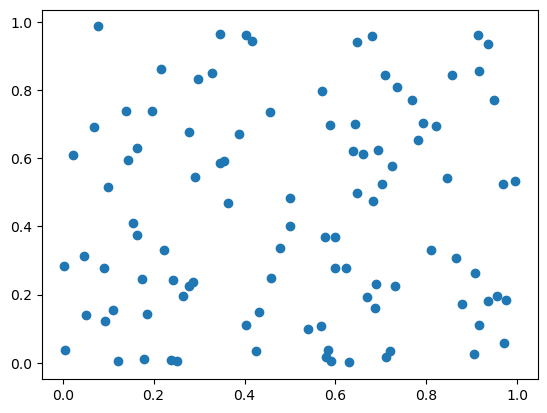

In [181]:
import matplotlib.pyplot as plt # グラフにプロットする機能をインポートし、pltの省略形として呼べるようにする
plt.scatter(x, y) # 乱数で作ったxとyの配列をplt.scatter(x軸の値, y軸の値)として代入

取得したデータの型がプロットできる数字の状態であるかを確認しましょう

In [168]:
type(df["hotelMinCharge"][0])# type(ここに判別したい変数)とするとその変数のデータ型がわかります。

str

In [169]:
# 文字列であるstrは数字として扱われなく、文字としてある買われるので、変数 + 変数とした時に数字の足し算のような処理になりません。
df["hotelMinCharge"][0] + df["hotelMinCharge"][1]

'30552591'

In [172]:
# 文字列を数字のデータ型に変換する時はint(変換したい変数)とすると数字のデータ型に変換できます。
int(df["hotelMinCharge"][0])

3055

In [171]:
# 足し算して数字として扱われているかを確認しましょう。
int(df["hotelMinCharge"][0]) + int(df["hotelMinCharge"][1])

5646

グラフにするためにxの値をホテル料金、yの値を評価して、X軸y軸のデータを作りましょう。

In [188]:
x = [] # 数字に変換したホテル料金を追加するための空配列
y = [] # 数字に変換したホテル評価を追加するための空配列

for i in range(0 ,len(df)): 
    a1 = int(df["hotelMinCharge"][i]) # ホテル料金を数字の型に変換
    a2 = float(df["reviewAverage"][i]) # ホテル評価を数字の型に変換

# -1として入力した欠損したホテル料金データを条件で追加処理しない事で、排除します。
    if (a1 > 0):
        x.append(a1) # xに数字に変換したホテル料金を追加
        y.append(a2) # yに数字に変換したホテル評価を追加


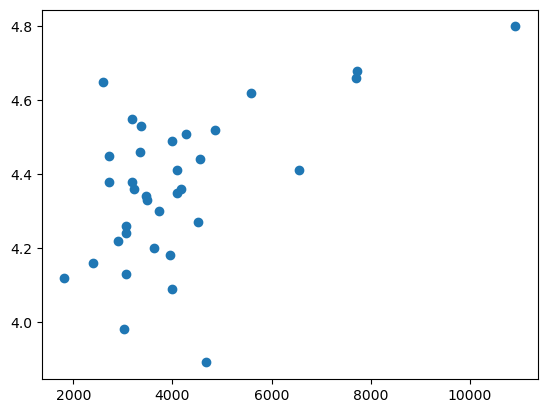

In [189]:
# 用意したxとyの配列をplt.scatter(x軸の値, y軸の値)として代入
plt.scatter(x, y)

可視化することで値段とホテルの評価の相関関係がだいたい分かったと思います！

## 3最後に

お疲れさまでした。  
スクレイピングは対策されている上に、仕様変更されるとすぐに動かなくなります。

その点APIは労力も対策されるリスクもないので、APIとスクレイピングは大きく違うとわかって頂けたかと思います。

次は、スクレイピングを自動で定期的に取得できるpythonの実行ファイルを学びましょう。